# Análisis estadístico a señales ECG y EMG

## 1. Implementación de funciones

### Importación de librerias

In [24]:
import numpy as np;                                                             # Librerias necesarias importadas
import scipy.io as sio;
import matplotlib.pyplot as plt;
import pandas as pd;

### Funcion para determinar el valor efectivo o rms de una señal

In [2]:
def RMS (senal):                                                                # Recibe los datos de una señal
    sumatoria = (1/len(senal))*sum(senal * senal);
    rms = np.sqrt(sumatoria);                                                   # Calculo el valor rms 
    return rms;                                                                 # Retorna el valor rms

## 2. Análisis Señal ECG

In [7]:
mat_contents = sio.loadmat('signals.mat');                                      
                                                                                # Inicialmente se carga la señal en formato matlab
print("Las claves cargadas fueron: " + str(mat_contents.keys()));               # y se muestra el formato en el cual estan registrados
senalECG_original = np.squeeze(mat_contents['ECG_asRecording']);                # los datos
senalECG_filtrada = np.squeeze(mat_contents['ECG_filtered']);


Las claves cargadas fueron: dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


### a) Determinar la duración de la señal y generar su respectivo vector de tiempo

In [86]:
Fs = 1024;                                                                      # Si en 1 segundo se obtuvieron 1024 muestras,                                                                                     
tiempo_ECG = np.arange( 0, len(senalECG_original)/Fs, 1/Fs);                    # por regla de 3 se obtiene que el tiempo 
                                                                                # total equivale al numero total de muestras 
                                                                                # entre la frecuencie de muestreo, de lo cual 
                                                                                # se determina el vector de tiempo

### b) Graficas de la señal original y filtrada de ECG

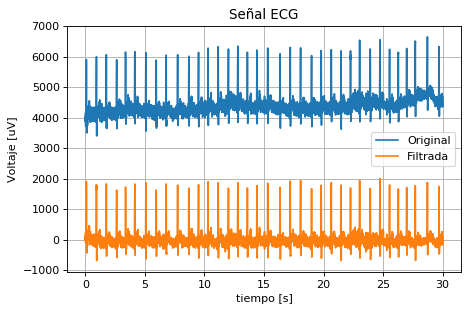

In [61]:
fig1 = plt.figure();                                                            # Se crea la figura contenedora
ax_fig1 = plt.axes();

ax_fig1.plot(tiempo_ECG,senalECG_original);                                     # Se grafican la señales                  
ax_fig1.plot(tiempo_ECG,senalECG_filtrada); 

ax_fig1.set_title('Señal ECG');                                                 # Se referenciacian las graficas 
ax_fig1.set_xlabel('tiempo [s]');
ax_fig1.set_ylabel('Voltaje [uV]');
ax_fig1.legend(['Original','Filtrada']);
ax_fig1.grid();

fig1.tight_layout();
plt.rcParams['figure.dpi'] = 80;

#### Análisis
Respecto a las señales ECG visualizadas, se nota que la señal original alcanza una amplitud mayor, y debido a que al ser 
filtrada, la estructura/forma se mantiene y únicamente se modifica en amplitud, se infiere que el filtro empleado eliminó
un nivel DC sobre el cual se encontraba la señal registrada inicialmente. Con base a esto, se deduce además, que el filtro
empleado fue de caracter Pasa Bajas, diseñado con el fin de eliminar las altas frecuencias de la señal DC. Usualmente en la
adquisicion de este tipo de señal, suelen implementarse otros filtros para eliminar diferentes tipos de ruido sin afectar la 
señal de interés, sin embargo, es inferible que este procedimiento no se realizó, dado que la señal ECG tiene 4 frecuencias 
embebidas (10 Hz para el complejo QRS, 1-2 Hz para la onda T.,En conjunto, cada latido se da a 1.25 Hz en promedio, lo cual 
corresponde a un período de 0.8 segundos) y cada una de ellas, en la señal filtrada aun se visualiza contaminada.

1: https://cvphysiology.com/Arrhythmias/A009

2: https://www.monografias.com/trabajos94/senal-ecg/senal-ecg.shtml

### c) Medidas estadisticas de un ciclo de ECG de la señal original


Análisis estadístico del DataFrame generado para un ciclo de ECG sin filtrar:

              [uV]
count   819.000000
mean   4159.394154
std     304.034619
min    3398.603760
25%    4022.026855
50%    4103.836914
75%    4201.685059
max    5988.818848

rms    4170.47766 
var   92324.18356 



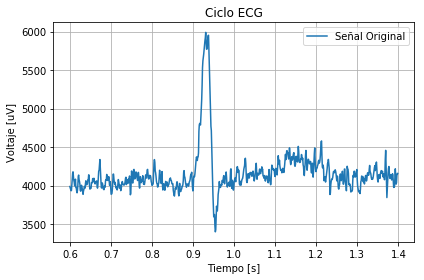

In [17]:
x_min = int(0.6*Fs);
x_max = int(1.4*Fs);

cicloECG_original = senalECG_original[x_min:x_max];                             # Se establece el intervalo 
tiempoCicloECG = tiempo_ECG[x_min:x_max];                                       # de 1 ciclo

fig2 = plt.figure();                                                            # Se crea la figura contenedora
ax_fig2 = plt.axes();

ax_fig2.plot(tiempoCicloECG,cicloECG_original);                                 # Se grafica la señal

ax_fig2.set_xlabel("Tiempo [s]");                                               # Se referencia la grafica
ax_fig2.set_ylabel("Voltaje [uV]");
ax_fig2.set_title("Ciclo ECG");
ax_fig2.legend(["Señal Original"]);
ax_fig2.grid();

fig2.tight_layout();
                                                                               
cicloECG_original_dataFrame = pd.DataFrame(cicloECG_original, 
                                           tiempoCicloECG,columns=['[uV]']);      # DataFrame(datos, indices)
rms = round(RMS(cicloECG_original),6);                                          # Se calcula el rms y la varianza
varianza = round(np.var(cicloECG_original),6);                                  # del ciclo de ECG con 6 decimales

print("\nAnálisis estadístico del DataFrame generado para un ciclo de ECG sin filtrar:\n");
print(cicloECG_original_dataFrame.describe());
print("\nrms    % s \nvar   % s \n" %(rms,varianza));

#### Análisis
El promedio y el valor efectivo rms de la señal, revelan que la mayoria de datos se mantienen sobre un pequeño margen alrededor de los 4150 uV, mientras que la desviacion estandar y la varianza indican dispersión del valor de las muestras respecto al promedio, y a la poca homogeneidad de la señal registrada, hechos atribuidos a la Onda QRS que generan datos atípicos en la poblacion muestral.

### d) Medidas estadisticas de un ciclo de ECG de la señal filtrada


Análisis estadístico del DataFrame generado para un ciclo de ECG filtrado:

              [uV]
count   819.000000
mean      5.354498
std     298.126652
min    -685.695445
25%    -113.009201
50%     -52.632045
75%      22.707357
max    1794.504490

rms     297.992701 
var   88770.978929 



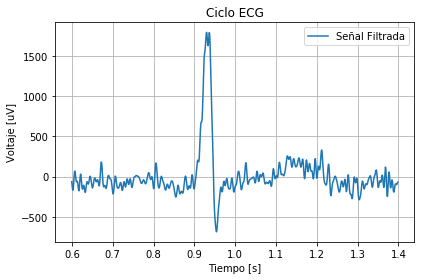

In [16]:
cicloECG_filtrado = senalECG_filtrada[x_min:x_max];

fig3 = plt.figure();                                                            # Se crea la figura contenedora
ax_fig3 = plt.axes();

ax_fig3.plot(tiempoCicloECG,cicloECG_filtrado);                                 # Se grafica la señal

ax_fig3.set_xlabel("Tiempo [s]");                                               # Se referencia la grafica
ax_fig3.set_ylabel("Voltaje [uV]");
ax_fig3.set_title("Ciclo ECG");
ax_fig3.legend(["Señal Filtrada"]);
ax_fig3.grid();

fig3.tight_layout();

cicloECG_filtrado_dataFrame = pd.DataFrame(
        cicloECG_filtrado, tiempoCicloECG,columns=['[uV]']);                      # DataFrame(datos, indices)
rms = round(RMS(cicloECG_filtrado),6);                                          # Se calcula el rms y la varianza
varianza = round(np.var(cicloECG_filtrado),6);                                  # del ciclo de ECG con 6 decimales

print("\nAnálisis estadístico del DataFrame generado para un ciclo de ECG filtrado:\n");
print(cicloECG_filtrado_dataFrame.describe());
print("\nrms     % s \nvar   % s \n" %(rms,varianza));

#### Análisis
El promedio y el valor rms, disminuyeron proporcionalmente respecto al análisis realizado a la señal sin filtrar, hecho que confirma el tipo de filtro implementado que se dedujo, y la dispersión de los datos respecto a la desviacion y la varianza arrojan cualidades análogas a las descritas previamente.

#### Comparación

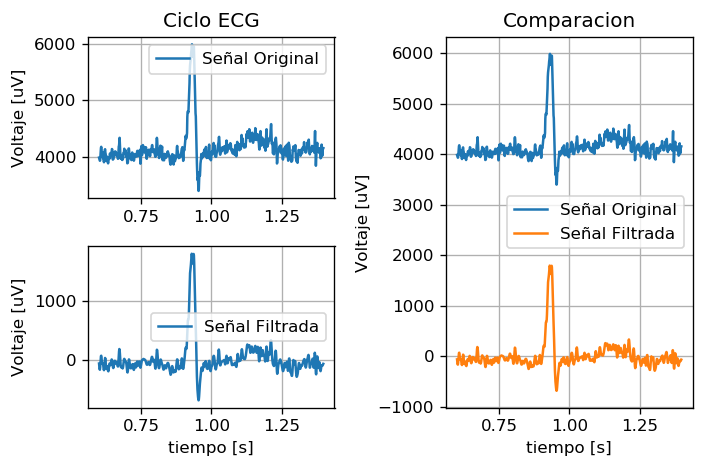

In [65]:
fig4 = plt.figure();
ax1 = plt.subplot(221);
ax2 = plt.subplot(223);
ax3 = plt.subplot(122);

ax1.plot(tiempoCicloECG,cicloECG_original);ax1.grid();                          # Se grafican las señales                                         
ax2.plot(tiempoCicloECG,cicloECG_filtrado);ax2.grid(); 
ax3.plot(tiempoCicloECG,cicloECG_original);ax3.grid();
ax3.plot(tiempoCicloECG,cicloECG_filtrado)

ax1.set_title('Ciclo ECG'); 
ax2.set_xlabel('tiempo [s]');                                                   # Se referencian los ejes
ax1.set_ylabel('Voltaje [uV]');
ax2.set_ylabel('Voltaje [uV]');
ax3.set_title('Comparacion');
ax3.set_xlabel('tiempo [s]'); 
ax3.set_ylabel('Voltaje [uV]');

ax1.legend(['Señal Original']);                                                 # Se referencian las graficas
ax2.legend(['Señal Filtrada']);
ax3.legend(['Señal Original','Señal Filtrada']);

fig4.tight_layout(); 
plt.rcParams['figure.dpi'] = 120;

Al graficar ambas señales en el mismo lugar, se aprecia de forma evidente que se eliminó un nivel DC sin modificar ninguna otra característica de la señal.

### e) Análisis estadística para 15 ciclos ECG de la señal filtrada

In [18]:
muestras_por_ciclo = x_max - x_min;                                             # tamaño de cada ciclo     
QuinceCiclos = np.zeros((muestras_por_ciclo,15));
QuinceTiempos = np.zeros((muestras_por_ciclo,15)); 

for i in range(15):                                                             # En cada columna de las matricez, 
    QuinceCiclos[:,i] = senalECG_filtrada[x_min:x_max];                         # se inserta un ciclo de la 
    QuinceTiempos[:,i] = tiempo_ECG[x_min:x_max];                               # señal filtrada de ECG y su 
    x_min = x_min + muestras_por_ciclo;                                         # respectivo intervalo de tiempo
    x_max = x_max + muestras_por_ciclo;

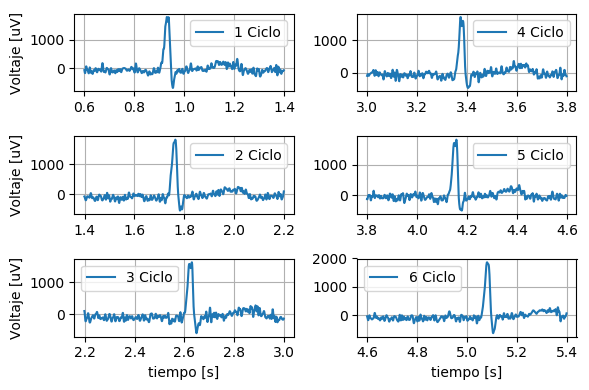

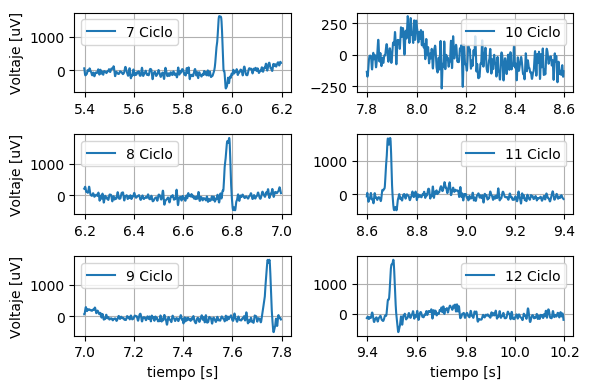

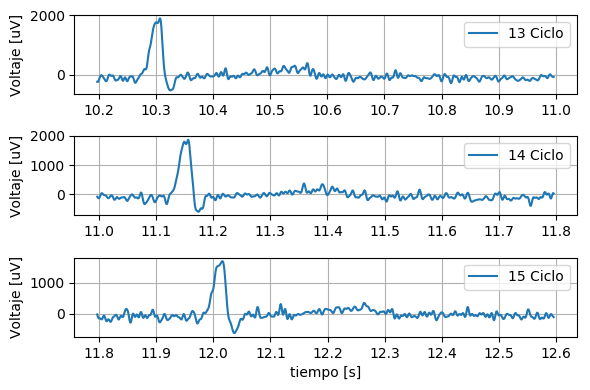

In [78]:
fig5,ax = plt.subplots(3,2);                                                    # Se crean las figuras contenedoras

ax[0,0].plot(QuinceTiempos[:,0],QuinceCiclos[:,0]);ax[0,0].grid();              # Se grafican las señales                                         
ax[1,0].plot(QuinceTiempos[:,1],QuinceCiclos[:,1]);ax[1,0].grid(); 
ax[2,0].plot(QuinceTiempos[:,2],QuinceCiclos[:,2]);ax[2,0].grid();  
ax[0,1].plot(QuinceTiempos[:,3],QuinceCiclos[:,3]);ax[0,1].grid();                                                                     
ax[1,1].plot(QuinceTiempos[:,4],QuinceCiclos[:,4]);ax[1,1].grid(); 
ax[2,1].plot(QuinceTiempos[:,5],QuinceCiclos[:,5]);ax[2,1].grid();  
                                                  
ax[2,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[2,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');
ax[2,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['1 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['2 Ciclo']);
ax[2,0].legend(['3 Ciclo']);
ax[0,1].legend(['4 Ciclo']);
ax[1,1].legend(['5 Ciclo']);
ax[2,1].legend(['6 Ciclo']);

fig5.tight_layout();                                                            # Ajusta el tamaño en la figura contenedora

#%%
fig6,ax = plt.subplots(3,2);

ax[0,0].plot(QuinceTiempos[:,6],QuinceCiclos[:,6]);ax[0,0].grid();              # Se grafican las señales                                         
ax[1,0].plot(QuinceTiempos[:,7],QuinceCiclos[:,7]);ax[1,0].grid(); 
ax[2,0].plot(QuinceTiempos[:,8],QuinceCiclos[:,8]);ax[2,0].grid();  
ax[0,1].plot(QuinceTiempos[:,9],QuinceCiclos[:,9]);ax[0,1].grid();                                                                      
ax[1,1].plot(QuinceTiempos[:,10],QuinceCiclos[:,10]);ax[1,1].grid(); 
ax[2,1].plot(QuinceTiempos[:,11],QuinceCiclos[:,11]);ax[2,1].grid();  
 
ax[2,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[2,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');
ax[2,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['7 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['8 Ciclo']);
ax[2,0].legend(['9 Ciclo']);
ax[0,1].legend(['10 Ciclo']);
ax[1,1].legend(['11 Ciclo']);
ax[2,1].legend(['12 Ciclo']);

fig6.tight_layout();                                                            # Ajusta el tamaño en la figura contenedora

#%%
fig7,ax = plt.subplots(3,1);

ax[0].plot(QuinceTiempos[:,12],QuinceCiclos[:,12]);ax[0].grid();                # Se grafican las señales                                         
ax[1].plot(QuinceTiempos[:,13],QuinceCiclos[:,13]);ax[1].grid(); 
ax[2].plot(QuinceTiempos[:,14],QuinceCiclos[:,14]);ax[2].grid(); 

ax[2].set_xlabel('tiempo [s]');                                                 # Se referencian los ejes
ax[0].set_ylabel('Voltaje [uV]');
ax[1].set_ylabel('Voltaje [uV]');
ax[2].set_ylabel('Voltaje [uV]');

ax[0].legend(['13 Ciclo']);                                                     # Se referencian las graficas
ax[1].legend(['14 Ciclo']);
ax[2].legend(['15 Ciclo']);

fig7.tight_layout();   
plt.rcParams['figure.dpi'] = 100;

##### Promedio y varianza

In [80]:
promedio_QuinceCiclos = np.zeros((15));
varianza_QuinceCiclos = np.zeros((15));
indice_ciclos_ECG = np.arange(1,16);

for i in range(15):
    promedio_QuinceCiclos[i] = round(np.mean(QuinceCiclos[:,i]),3);
    varianza_QuinceCiclos[i] = round(np.var(QuinceCiclos[:,i]),3);
    
promedio_y_varianza_ECG = pd.DataFrame({"Promedio [uV]": promedio_QuinceCiclos,
                                        "Varianza [uV]": varianza_QuinceCiclos});
print(promedio_y_varianza_ECG);

    Promedio [uV]  Varianza [uV]
0           5.354      88770.979
1          -7.128      86705.556
2         -17.484      78106.722
3          13.064      78138.191
4          12.072      87040.847
5          -3.099      92152.674
6          -8.474      74307.045
7           5.999      84713.067
8         -13.782      85752.661
9         -21.201      10801.760
10         -1.942      78083.288
11          4.815      82815.106
12          3.594      92908.027
13         -7.047      93799.159
14         14.835      78750.073


#### Análisis
Al observar la onda QRS (que corresponde al pico) de los 15 ciclos de ECG puede apreciarse como se desfasa la señal a partir del ciclo 7, e incluso es afectada fuertemente por una distorsión en el ciclo 10. Este comportamiento implica que 
los ciclos ECG carecen de una frecuencia constante, factor que desencadena la nula coincidencia de las medidas estadísticas entre ciclos como puede observarse en la tabla 1.

Con base en este análisis puede determinarse que la señal no es estacionaria por dos motivos, el primero según su definición, considera una señal estacionaria cuando sus datos estadísticos son constantes a lo largo del tiempo; y el segundo desde un punto de vista cualitativo, detalla la invarianza de las propiedades del objeto, los cuales para esta señal pueden ser amplitud y frecuencia de ciclos.

https://link.springer.com/chapter/10.1007/978-3-642-97177-8_4

## 3. Análisis Señal EMG

In [81]:
print("Las claves cargadas fueron: " + str(mat_contents.keys()));                                
senalEMG_triceps_original = np.squeeze(mat_contents['EMG_asRecording1']);       # Una vez cargado el archivo, se extraen           
senalEMG_triceps_filtrada = np.squeeze(mat_contents['EMG_filtered1']);          # las señales EMG correspondientes al
senalEMG_biceps_original = np.squeeze(mat_contents['EMG_asRecording2']);        # biceps y triceps antes y despues de
senalEMG_biceps_filtrada = np.squeeze(mat_contents['EMG_filtered2']);           # aplicar el filtro.


Las claves cargadas fueron: dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


### a) Determinar la duración de la señal y generar su respectivo vector de tiempo

In [82]:
Fs = 1024;                                                                      # Si en 1 segundo se obtuvieron 1024 muestras,                                                                                     
tiempoEMG = np.arange( 0, len(senalEMG_triceps_original)/Fs, 1/Fs);             # por regla de 3 se obtiene que el tiempo 
                                                                                # total equivale al numero total de muestras 
                                                                                # entre la frecuencie de muestreo, de lo cual 
                                                                                # se determina el vector de tiempo

### b) Comparación señal EMG filtrada y sin filtrar de cada músculo

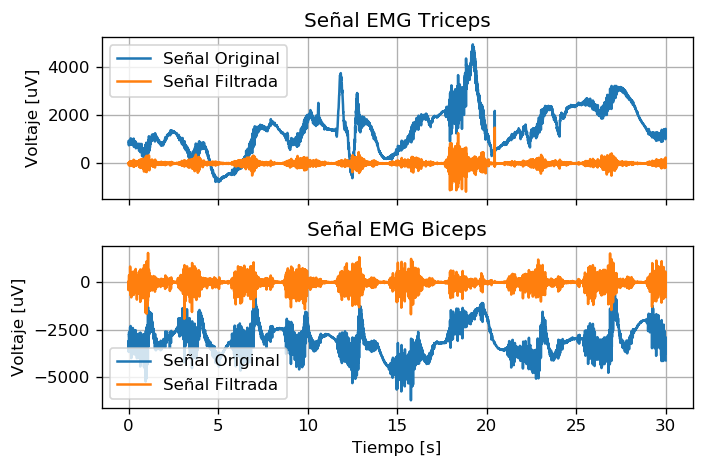

In [85]:
fig8,ax = plt.subplots(2,1,sharex='col');

ax[0].plot(tiempoEMG,senalEMG_triceps_original);ax[0].grid();                  # Se grafican las señales                                         
ax[0].plot(tiempoEMG,senalEMG_triceps_filtrada);
ax[1].plot(tiempoEMG,senalEMG_biceps_original);ax[1].grid();                                                                     
ax[1].plot(tiempoEMG,senalEMG_biceps_filtrada);
   
#ax[0].set_xlabel("Tiempo [s]");                                                 # Se referencian los ejes
ax[0].set_ylabel("Voltaje [uV]");
ax[1].set_xlabel("Tiempo [s]");                                               
ax[1].set_ylabel("Voltaje [uV]");

ax[0].set_title("Señal EMG Triceps");                                           # Se referencias las graficas
ax[1].set_title("Señal EMG Biceps");
ax[0].legend(["Señal Original","Señal Filtrada"]);
ax[1].legend(["Señal Original","Señal Filtrada"]);

fig8.tight_layout();  
plt.rcParams['figure.dpi'] = 120;

#### Análisis
Las señales originales (trazadas en color azul) evidencian estar contaminadas por diferentes tipos de ruido, dentro de los cuales pueden estar el típico ruido eléctrico generado por la red, el entorno en el que se realice el procedimiento
con la presencia de timbres, campos eléctricos o magnéticos, y directamente por los electrodos y su entorno que integra impurezas, el contacto con la piel y demas agentes biológicos que puedan intervenir.
[http://www.dalcame.com/emg.html#.Xm1YoKhKjIV]

Adicionalmente se observa un nivel DC positivo para la señal del triceps y negativo para la del biceps, quiza debida al electrodo de referencia empleado para el registro, por lo que inicialmente al igual que en el análisis de la señal ECG, debería eliminarse este offset con un filtro pasa bajas.

Posteriormente, para terminar de limpiar la señal debe implementarse un filtro pasa banda, cuyo ancho de banda cubra las frecuencias de la EMG, que en promedio se encuentran entre 2 y 500 Hz.
[http://repositorio.urp.edu.pe/bitstream/handle/urp/416/Alva_ca.pdf?sequence=1&isAllowed=y]

### c) Análisis de un tramo de contracción de cada músculo

#### Para el triceps:

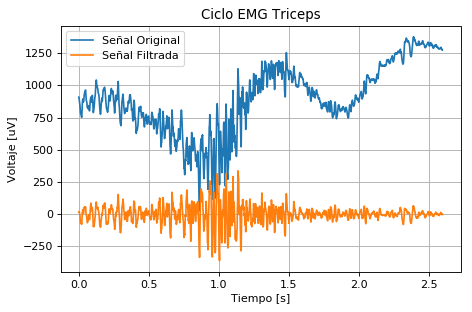

In [109]:
x_min = int(0*Fs);
x_max = int(2.6*Fs);
tiempoCicloEMG = tiempoEMG[x_min:x_max];  

cicloEMG_triceps_original = senalEMG_triceps_original[x_min:x_max];             # Se establece el intervalo 
cicloEMG_triceps_filtrada = senalEMG_triceps_filtrada[x_min:x_max];             # de 1 ciclo

fig9 = plt.figure();                                                            # Se crea la figura contenedora
ax_fig9 = plt.axes();

ax_fig9.plot(tiempoCicloEMG,cicloEMG_triceps_original);                         # Se grafica la señal
ax_fig9.plot(tiempoCicloEMG,cicloEMG_triceps_filtrada);                         # Se grafica la señal

ax_fig9.set_xlabel("Tiempo [s]");                                               # Se referencia la grafica
ax_fig9.set_ylabel("Voltaje [uV]");
ax_fig9.set_title("Ciclo EMG Triceps");
ax_fig9.legend(["Señal Original","Señal Filtrada"]);
ax_fig9.grid();

fig9.tight_layout();
plt.rcParams['figure.dpi'] = 80;


#### Para el biceps:

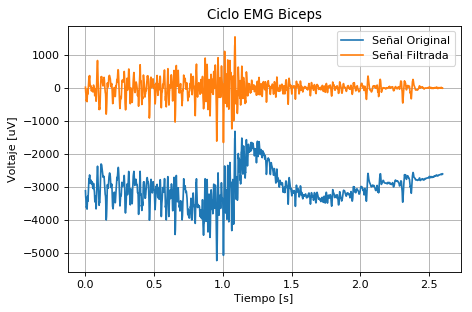

In [110]:
cicloEMG_biceps_original = senalEMG_biceps_original[x_min:x_max];               # Se establece el intervalo 
cicloEMG_biceps_filtrada = senalEMG_biceps_filtrada[x_min:x_max];               # de 1 ciclo

fig10 = plt.figure();                                                           # Se crea la figura contenedora
ax_fig10 = plt.axes();

ax_fig10.plot(tiempoCicloEMG,cicloEMG_biceps_original);                         # Se grafica la señal
ax_fig10.plot(tiempoCicloEMG,cicloEMG_biceps_filtrada);                         # Se grafica la señal

ax_fig10.set_xlabel("Tiempo [s]");                                              # Se referencia la grafica
ax_fig10.set_ylabel("Voltaje [uV]");
ax_fig10.set_title("Ciclo EMG Biceps");
ax_fig10.legend(["Señal Original","Señal Filtrada"]);
ax_fig10.grid();

fig10.tight_layout();

#### Comparación estadística

In [112]:
cicloEMG_triceps_filtrada_dataFrame = pd.DataFrame(
        cicloEMG_triceps_filtrada,tiempoCicloEMG,columns=['uV']);               # DataFrame(datos, indices)

rms_triceps = round(RMS(cicloEMG_triceps_filtrada),6);                          # Se calcula el rms y la varianza
varianza_triceps = round(np.var(cicloEMG_triceps_filtrada),6);                  # del ciclo de ECG con 6 decimales


cicloEMG_biceps_filtrada_dataFrame = pd.DataFrame(
        cicloEMG_biceps_filtrada,tiempoCicloEMG,columns=['uV']);                # DataFrame(datos, indices)

rms_biceps = round(RMS(cicloEMG_biceps_filtrada),6);                            # Se calcula el rms y la varianza
varianza_biceps = round(np.var(cicloEMG_biceps_filtrada),6);                    # del ciclo de ECG con 6 decimales

print("\nEMG Triceps:");
print(cicloEMG_triceps_filtrada_dataFrame.describe());
print("rms      % s \nvar    % s " %(rms_triceps,varianza_triceps));


print("\nEMG Biceps:");
print(cicloEMG_biceps_filtrada_dataFrame.describe());
print("rms     % s \nvar   % s " %(rms_biceps,varianza_biceps));


EMG Triceps:
                uV
count  2662.000000
mean     -0.125064
std      73.720294
min    -360.065771
25%     -29.481819
50%       1.464912
75%      32.098830
max     336.641982
rms      73.706552 
var    5432.640159 

EMG Biceps:
                uV
count  2662.000000
mean     -0.850756
std     268.315546
min   -1652.202657
25%     -91.172026
50%       6.108179
75%     105.979595
max    1543.769560
rms     268.266493 
var   71966.187375 


#### Análisis
Los valores del promedio y el valor efectivo indican que las señales difieren en amplitud, siendo mucho mayor la señal registrada en el biceps, Además la desviacion estandar indica que el voltaje registrado difiere en mayor medida del promedio para la señal del bicep en comparación con la del tricep, hecho que ratifica la varianza, de la cual se infiere que la señal del triceps es mas homogénea que la del biceps, factor que en particular puede notarse visualmente al comparar ambas gráficas.

### d) Promedio y varianza para cada tramo de la señal filtrada EMG del biceps y triceps

#### Para el triceps

In [113]:
ciclo1 = senalEMG_triceps_filtrada[int(0*Fs):int(2.6*Fs)];                      # En esta sección se determina el                  
tiempo1 = tiempoEMG[int(0*Fs):int(2.6*Fs)];                                     # intervalo en el cual se encuentra                  
promedio1 = np.mean(ciclo1);                                                    # la contracción del Triceps.
varianza1 = np.var(ciclo1);
                                                                                # Además se calcula el promedio, y la
ciclo2 = senalEMG_triceps_filtrada[int(2.6*Fs):int(5.4*Fs)];                    # varianza para cada tramo de contraccion               
tiempo2  = tiempoEMG[int(2.6*Fs):int(5.4*Fs)];                                  
promedio2 = np.mean(ciclo1);
varianza2 = np.var(ciclo1);

ciclo3 = senalEMG_triceps_filtrada[int(5.5*Fs):int(8.4*Fs)];                   
tiempo3  = tiempoEMG[int(5.5*Fs):int(8.4*Fs)];   
promedio3 = np.mean(ciclo1);
varianza3 = np.var(ciclo1);

ciclo4 = senalEMG_triceps_filtrada[int(8.5*Fs):int(11.3*Fs)];                   
tiempo4  = tiempoEMG[int(8.5*Fs):int(11.3*Fs)];    
promedio4 = np.mean(ciclo1);
varianza4 = np.var(ciclo1);

ciclo5 = senalEMG_triceps_filtrada[int(11.5*Fs):int(14*Fs)];                   
tiempo5  = tiempoEMG[int(11.5*Fs):int(14*Fs)];   
promedio5 = np.mean(ciclo1);
varianza5 = np.var(ciclo1);

ciclo6 = senalEMG_triceps_filtrada[int(14.5*Fs):int(17.5*Fs)];                   
tiempo6 = tiempoEMG[int(14.5*Fs):int(17.5*Fs)];   
promedio6 = np.mean(ciclo1);
varianza6 = np.var(ciclo1);

ciclo7 = senalEMG_triceps_filtrada[int(17.5*Fs):int(20.5*Fs)];                   
tiempo7 = tiempoEMG[int(17.5*Fs):int(20.5*Fs)];  
promedio7 = np.mean(ciclo1);
varianza7 = np.var(ciclo1);

ciclo8 = senalEMG_triceps_filtrada[int(20.5*Fs):int(25*Fs)];                   
tiempo8  = tiempoEMG[int(20.5*Fs):int(25*Fs)];   
promedio8 = np.mean(ciclo1);
varianza8 = np.var(ciclo1);

ciclo9 = senalEMG_triceps_filtrada[int(25*Fs):int(28.8*Fs)];                   
tiempo9  = tiempoEMG[int(25*Fs):int(28.8*Fs)];   
promedio9 = np.mean(ciclo1);
varianza9 = np.var(ciclo1);

ciclo10 = senalEMG_triceps_filtrada[int(28.8*Fs):int(30*Fs)];
tiempo10  = tiempoEMG[int(28.8*Fs):int(30*Fs)];                   
promedio10 = np.mean(ciclo1);
varianza10 = np.var(ciclo1); 

promedio_diezCiclos_triceps = np.array([promedio1, promedio2, promedio3, 
                                        promedio4, promedio5, promedio6, 
                                        promedio7, promedio8, promedio9, 
                                        promedio10]);
    
varianza_diezCiclos_triceps = np.array([varianza1, varianza2, varianza3, 
                                        varianza4, varianza5, varianza6, 
                                        varianza7, varianza8, varianza9, 
                                        varianza10]);

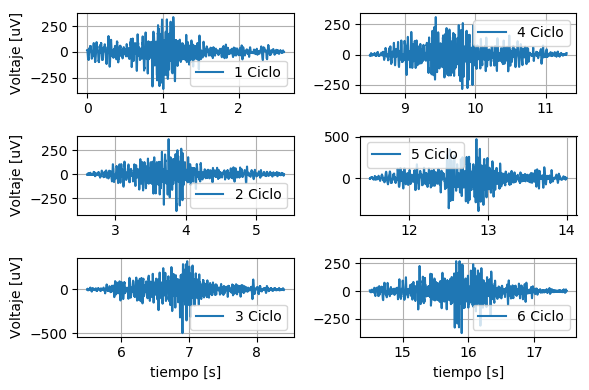

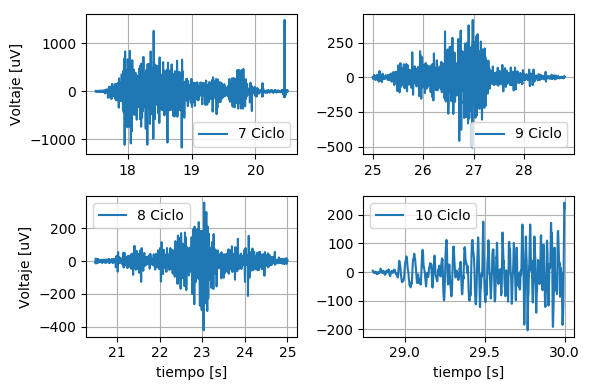

In [123]:
fig11,ax = plt.subplots(3,2);                                                   # Se crean las figuras contenedoras

ax[0,0].plot(tiempo1,ciclo1);ax[0,0].grid();                                    # Se grafican las señales                                         
ax[1,0].plot(tiempo2,ciclo2);ax[1,0].grid(); 
ax[2,0].plot(tiempo3,ciclo3);ax[2,0].grid();  
ax[0,1].plot(tiempo4,ciclo4);ax[0,1].grid();                                                                     
ax[1,1].plot(tiempo5,ciclo5);ax[1,1].grid(); 
ax[2,1].plot(tiempo6,ciclo6);ax[2,1].grid();  
                                                  
ax[2,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[2,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');
ax[2,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['1 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['2 Ciclo']);
ax[2,0].legend(['3 Ciclo']);
ax[0,1].legend(['4 Ciclo']);
ax[1,1].legend(['5 Ciclo']);
ax[2,1].legend(['6 Ciclo']);

fig11.tight_layout();    

#%%
fig12,ax = plt.subplots(2,2);                                                   # Se crean las figuras contenedoras

ax[0,0].plot(tiempo7,ciclo7);ax[0,0].grid();                                    # Se grafican las señales                                         
ax[1,0].plot(tiempo8,ciclo8);ax[1,0].grid(); 
ax[0,1].plot(tiempo9,ciclo9);ax[0,1].grid();  
ax[1,1].plot(tiempo10,ciclo10);ax[1,1].grid();    
                                                  
ax[1,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[1,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['7 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['8 Ciclo']);
ax[0,1].legend(['9 Ciclo']);
ax[1,1].legend(['10 Ciclo']);

fig12.tight_layout();
plt.rcParams['figure.dpi'] = 100

#### Para el biceps:

In [124]:
ciclo1 = senalEMG_biceps_filtrada[int(0*Fs):int(2.6*Fs)];                       # En esta sección se definen los                
tiempo1 = tiempoEMG[int(0*Fs):int(2.6*Fs)];                                     # intervalos en los que se encuentra                    
promedio1 = np.mean(ciclo1);                                                    # cada contracción del Biceps.
varianza1 = np.var(ciclo1);
                                                                                # Además se calcula el promedio, y la                  
ciclo2 = senalEMG_biceps_filtrada[int(2.6*Fs):int(5.4*Fs)];                     # varianza para cada tramo de contraccion
tiempo2  = tiempoEMG[int(2.6*Fs):int(5.4*Fs)];    
promedio2 = np.mean(ciclo1);
varianza2 = np.var(ciclo1);

ciclo3 = senalEMG_biceps_filtrada[int(5.55*Fs):int(8.3*Fs)];                   
tiempo3  = tiempoEMG[int(5.55*Fs):int(8.3*Fs)];   
promedio3 = np.mean(ciclo1);
varianza3 = np.var(ciclo1);

ciclo4 = senalEMG_biceps_filtrada[int(8.5*Fs):int(11.2*Fs)];                   
tiempo4  = tiempoEMG[int(8.5*Fs):int(11.2*Fs)];    
promedio4 = np.mean(ciclo1);
varianza4 = np.var(ciclo1);

ciclo5 = senalEMG_biceps_filtrada[int(11.5*Fs):int(14*Fs)];                   
tiempo5  = tiempoEMG[int(11.5*Fs):int(14*Fs)];   
promedio5 = np.mean(ciclo1);
varianza5 = np.var(ciclo1);

ciclo6 = senalEMG_biceps_filtrada[int(14.5*Fs):int(17.5*Fs)];                   
tiempo6 = tiempoEMG[int(14.5*Fs):int(17.5*Fs)];   
promedio6 = np.mean(ciclo1);
varianza6 = np.var(ciclo1);

ciclo7 = senalEMG_biceps_filtrada[int(17.6*Fs):int(20*Fs)];                   
tiempo7 = tiempoEMG[int(17.6*Fs):int(20*Fs)];  
promedio7 = np.mean(ciclo1);
varianza7 = np.var(ciclo1);

ciclo8 = senalEMG_biceps_filtrada[int(21*Fs):int(25*Fs)];                   
tiempo8  = tiempoEMG[int(21*Fs):int(25*Fs)];   
promedio8 = np.mean(ciclo1);
varianza8 = np.var(ciclo1);

ciclo9 = senalEMG_biceps_filtrada[int(25*Fs):int(28.5*Fs)];                   
tiempo9  = tiempoEMG[int(25*Fs):int(28.5*Fs)];   
promedio9 = np.mean(ciclo1);
varianza9 = np.var(ciclo1);

ciclo10 = senalEMG_biceps_filtrada[int(28.8*Fs):int(30*Fs)];                   
tiempo10  = tiempoEMG[int(28.8*Fs):int(30*Fs)];    
promedio10 = np.mean(ciclo1);
varianza10 = np.var(ciclo1);

promedio_diezCiclos_biceps = np.array([promedio1, promedio2, promedio3, 
                                       promedio4, promedio5, promedio6, 
                                       promedio7, promedio8, promedio9, 
                                       promedio10]);
    
varianza_diezCiclos_biceps = np.array([varianza1, varianza2, varianza3, 
                                       varianza4, varianza5, varianza6, 
                                       varianza7, varianza8, varianza9, 
                                       varianza10]);

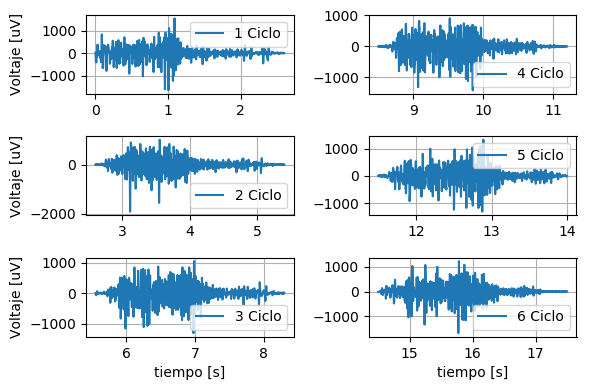

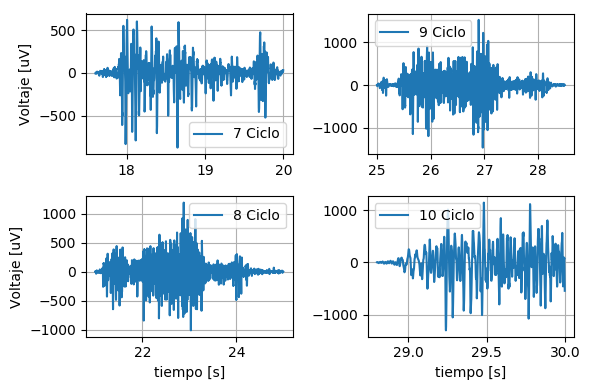

In [125]:
fig13,ax = plt.subplots(3,2);                                                   # Se crean las figuras contenedoras

ax[0,0].plot(tiempo1,ciclo1);ax[0,0].grid();                                    # Se grafican las señales                                         
ax[1,0].plot(tiempo2,ciclo2);ax[1,0].grid(); 
ax[2,0].plot(tiempo3,ciclo3);ax[2,0].grid();  
ax[0,1].plot(tiempo4,ciclo4);ax[0,1].grid();                                                                     
ax[1,1].plot(tiempo5,ciclo5);ax[1,1].grid(); 
ax[2,1].plot(tiempo6,ciclo6);ax[2,1].grid();  
                                                  
ax[2,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[2,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');
ax[2,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['1 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['2 Ciclo']);
ax[2,0].legend(['3 Ciclo']);
ax[0,1].legend(['4 Ciclo']);
ax[1,1].legend(['5 Ciclo']);
ax[2,1].legend(['6 Ciclo']);

fig13.tight_layout();    

#%%
fig14,ax = plt.subplots(2,2);                                                   # Se crean las figuras contenedoras

ax[0,0].plot(tiempo7,ciclo7);ax[0,0].grid();                                    # Se grafican las señales                                         
ax[1,0].plot(tiempo8,ciclo8);ax[1,0].grid(); 
ax[0,1].plot(tiempo9,ciclo9);ax[0,1].grid();  
ax[1,1].plot(tiempo10,ciclo10);ax[1,1].grid();    
                                                  
ax[1,0].set_xlabel('tiempo [s]');                                               # Se referencian los ejes
ax[1,1].set_xlabel('tiempo [s]');
ax[0,0].set_ylabel('Voltaje [uV]');
ax[1,0].set_ylabel('Voltaje [uV]');

ax[0,0].legend(['7 Ciclo']);                                                    # Se referencian las graficas
ax[1,0].legend(['8 Ciclo']);
ax[0,1].legend(['9 Ciclo']);
ax[1,1].legend(['10 Ciclo']);

fig14.tight_layout();    


#### Promedio y Varianza

In [126]:
promedio_EMG = pd.DataFrame({"Promedio_triceps [uV]": promedio_diezCiclos_triceps,
                             "Promedio_biceps [uV]": promedio_diezCiclos_biceps});
print(promedio_EMG);

varianza_EMG = pd.DataFrame({"Varianza_triceps [uV]": varianza_diezCiclos_triceps,
                             "Varianza_biceps [uV]": varianza_diezCiclos_biceps,});
print(varianza_EMG);

   Promedio_triceps [uV]  Promedio_biceps [uV]
0              -0.125064             -0.850756
1              -0.125064             -0.850756
2              -0.125064             -0.850756
3              -0.125064             -0.850756
4              -0.125064             -0.850756
5              -0.125064             -0.850756
6              -0.125064             -0.850756
7              -0.125064             -0.850756
8              -0.125064             -0.850756
9              -0.125064             -0.850756
   Varianza_triceps [uV]  Varianza_biceps [uV]
0            5432.640159          71966.187375
1            5432.640159          71966.187375
2            5432.640159          71966.187375
3            5432.640159          71966.187375
4            5432.640159          71966.187375
5            5432.640159          71966.187375
6            5432.640159          71966.187375
7            5432.640159          71966.187375
8            5432.640159          71966.187375
9            

#### Análisis 
El promedio y la varianza de ambas señales musculares prevalece a lo largo del tiempo, es decir que cada tramo de contracción puede considerarse con las mismas propiedades de amplitud y frecuencia, que a diferencia del corazon, su señal ECG no presenta las mismas propiedades en cada tramo de actividad eléctrica, y dada la definición descrita en secciones previas, una señal es estacionaria si mantiene las mismas características estadísticas a traves del tiempo, hecho que sucede en la señal de contracción EMG del biceps y el triceps.

### Conclusiones

1. Las señales fisiológicas analizadas carecen de homogeneidad dado el comportamiento que tiene el corazon y las neuronas motoras, por lo que al realizar un análisis estadístico, encontrar altos valores de varianza y desviación estándar es normal, pues la variedad de picos en la señal (en particular si se analiza una señal contaminada por ruido) generan valores atípicos que distan del promedio.

2. Las señales fisiológicas teóricamente no son estacionarias. Sin embargo, al analizar la EMG tomando cada tramo de contracción y determinar que sus características estadísticas no cambian en el tiempo, podría concluirse que esta señal sí lo es, pero al tomar manualmente cada tramo, se ignora la frecuencia de la actividad EMG, la cual cambia con el tiempo, por lo que no puede determinarse los instantes de tiempo exactos en los cuales habra una contracción.

3. La implementación de filtros pasa bajas, es una etapa indispensable en el registro de señales fisiológicas, sin estos la contaminación por un nivel DC de la señal capturada puede malinterpretarse en su análisis.